# Practical Work 3 Classification with Bayes - System Evaluation
## Students
- Flavia Pittet
- Fabio Vitali

## Exercice 1 Classification system using Bayes
### a. Bayes - Histograms
Implement a classifier based on Bayes using histograms to estimate the likelihoods.

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and
x2. The last column holds the class label y.

b) Compute the priors of both classes P(C0) and P(C1).

c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these
histograms. Advice : use the numpy histogram(a,bins=’auto’) function.

pass rate = 0.6
fail rate = 0.4
[ 3  5  9  9 16  9  9] [40.45755098 48.93902339 57.42049579 65.90196819 74.38344059 82.86491299
 91.3463854  99.8278578 ]


Text(0.5,1,'x2 Grade Fail')

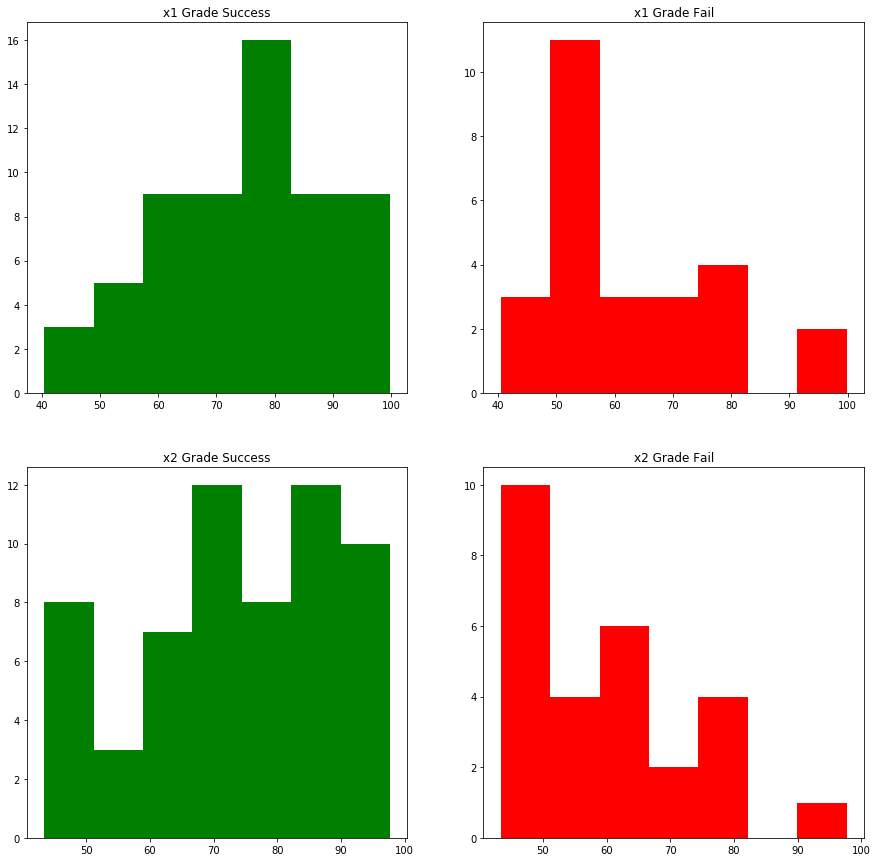

In [1]:
# basic imports
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# a) read data
trainingset = pd.read_csv('data/ex1-data-train.csv',  names=['grade1', 'grade2', 'pass'])
x1 = trainingset['grade1'].values
x2 = trainingset['grade2'].values
y = trainingset['pass'].values
trainset = list(zip(x1, x2, y))

testset = pd.read_csv('data/ex1-data-test.csv',  names=['grade1', 'grade2', 'pass'])
testx1 = testset['grade1'].values
testx2 = testset['grade2'].values
testy = testset['pass'].values

testset = list(zip(testx1, testx2, testy))

## b) compute priors
priorCpass = sum([1 for x1, x2, y in trainset if y])/len(trainset)


priorCfail = 1 - priorCpass

print('pass rate = {}\nfail rate = {}'.format(priorCpass, priorCfail))
## c) histogram
#[x for x,_,_ in trainset]
#[y for _,_,y in trainset]
fig = plt.figure(figsize=(15,15))


pltx1Success = fig.add_subplot(2, 2, 1)
x1Success = [x for x,_,y in trainset if y]
x1SuccessValues, x1SuccessBins = np.histogram(x1Success, bins='auto')
pltx1Success.hist(x=x1Success, bins=x1SuccessBins, color='green')
pltx1Success.set_title('x1 Grade Success')

pltx1Fail = fig.add_subplot(2, 2, 2)
x1Fail = [x for x,_,y in trainset if not y]
x1FailValues, x1FailBins = np.histogram(x1Success, bins='auto')
pltx1Fail.hist(x=x1Fail, bins=x1FailBins, color='red')
pltx1Fail.set_title('x1 Grade Fail')

print(x1SuccessValues, x1SuccessBins)

pltx2Success = fig.add_subplot(2, 2, 3)
x2Success = [x for _,x,y in trainset if y]
x2SuccessValues, x2SuccessBins = np.histogram(x2Success, bins='auto')
pltx2Success.hist(x=x2Success, bins=x2SuccessBins, color='green')
pltx2Success.set_title('x2 Grade Success')

pltx2Fail = fig.add_subplot(2, 2, 4)
x2Fail = [x for _,x,y in trainset if not y]
x2FailValues, x2FailBins = np.histogram(x2Success, bins='auto')
pltx2Fail.hist(x=x2Fail, bins=x2FailBins, color='red')
pltx2Fail.set_title('x2 Grade Fail')


d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1).
For this define a function likelihoodHist(x,histValues,edgeValues) that returns
the likelihood of x for a given histogram (defined by its values and bin edges as returned
by the numpy histogram() function).

In [2]:
def likelihoodHist(x,histValues,edgeValues):
    i = 0
    for i in range(len(edgeValues)):
        if edgeValues[i] >= x:
            break
    if i == 0:
        return 0

    i -= 1
    
    return histValues[i] / sum(histValues)

e) Implement the classification decision according to Bayes rule and compute the overall
accuracy of the system on the test set ex1-data-test.csv. :

- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e.p(X|Ck) = p(x1|Ck) · p(x2|Ck)

Which system is the best ?

The last one because it takes more parameters into consideration and therefore has a better success rate.

In [3]:
def bayes_rule_x1(x):
    likelihoodSuccess = likelihoodHist(x, x1SuccessValues, x1SuccessBins) * priorCpass
    likelihoodFail    = likelihoodHist(x, x1FailValues,    x1FailBins)    * priorCfail
    return likelihoodSuccess > likelihoodFail

def bayes_rule_x2(x):
    likelihoodSuccess = likelihoodHist(x, x2SuccessValues, x2SuccessBins) * priorCpass
    likelihoodFail    = likelihoodHist(x, x2FailValues,    x2FailBins)    * priorCfail
    return likelihoodSuccess > likelihoodFail


def bayes_rule(x1, x2):
    likelihoodSuccessX1 = likelihoodHist(x1, x1SuccessValues, x1SuccessBins) * priorCpass
    likelihoodFailX1    = likelihoodHist(x1, x1FailValues,    x1FailBins)    * priorCfail
    likelihoodSuccessX2 = likelihoodHist(x2, x2SuccessValues, x2SuccessBins) * priorCpass
    likelihoodFailX2    = likelihoodHist(x2, x2FailValues,    x2FailBins)    * priorCfail
    
    return likelihoodSuccessX1 * likelihoodSuccessX2 > likelihoodFailX1 * likelihoodFailX2


successX1 = 0
successX2 = 0
successBoth = 0
for x1, x2, y in testset:
    
    if bayes_rule_x1(x1) == y:
        successX1 += 1
    if bayes_rule_x2(x2) == y:
        successX2 += 1
    if bayes_rule(x1, x2) == y:
        successBoth += 1

    
print('Success rate bayes on x1        = {}'.format(successX1/len(testset)))
print('Success rate bayes on x2        = {}'.format(successX2/len(testset)))
print('Success rate bayes on x1 and x2 = {}'.format(successBoth/len(testset)))

Success rate bayes on x1        = 0.7
Success rate bayes on x2        = 0.67
Success rate bayes on x1 and x2 = 0.85


### b. Bayes - Univariate Gaussian distribution
Do the same as in c. but this time using univariate Gaussian distribution to model the likelihoods
p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions mean() and var()
to compute the mean µ and variance σ2 of the distribution. To model the likelihood of both
features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) =
p(x1|Ck) · p(x2|Ck).

Success rate Univariate Gaussian distribution on x1        = 0.71
Success rate Univariate Gaussian distribution on x2        = 0.72
Success rate Univariate Gaussian distribution on x1 and x2 = 0.92


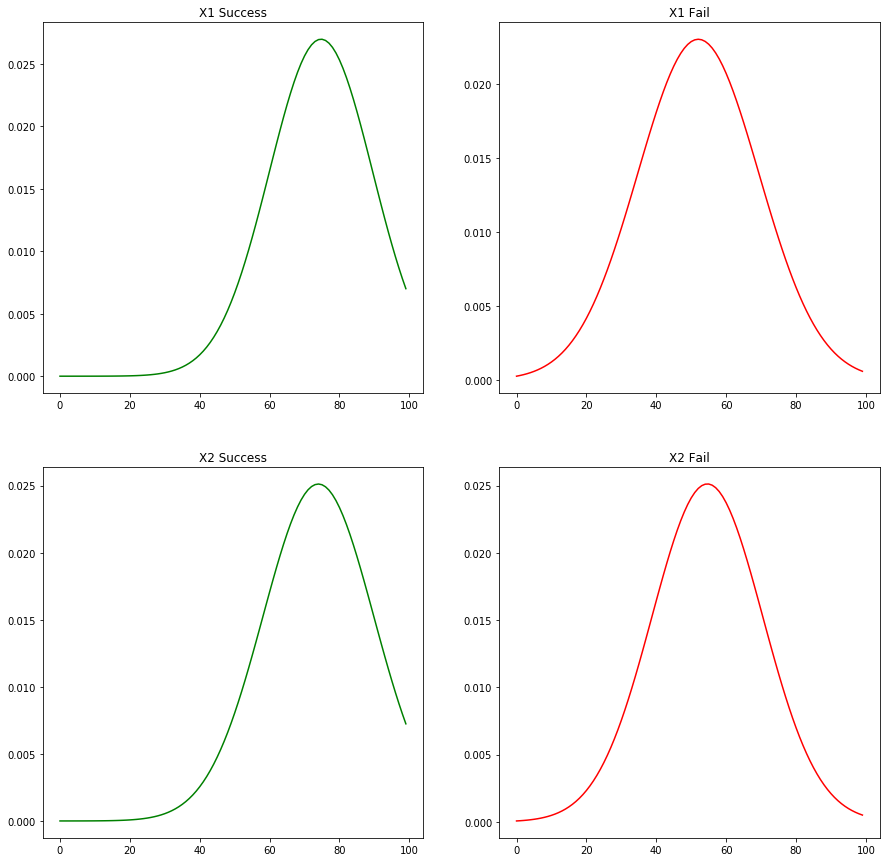

In [4]:
x1SuccessMean = np.mean(x1Success)
x1SuccessVar = np.var(x1Success)

x1FailMean = np.mean(x1Fail)
x1FailVar = np.var(x1Fail)

x2SuccessMean = np.mean(x2Success)
x2SuccessVar = np.var(x2Success)

x2FailMean = np.mean(x2Fail)
x2FailVar = np.var(x2Fail)

def univariate_gaussian_distribution(x, mean, var):
    v1 = (2*np.pi*var)**0.5
    v2 = np.exp(-(x-mean)**2 / (2*var))

    return v2/v1

fig = plt.figure(figsize=(15,15))


pltx1Success = fig.add_subplot(2, 2, 1)
pltx1Success.set_title('X1 Success')
pltx1Success.plot(range(100), [univariate_gaussian_distribution(x, x1SuccessMean, x1SuccessVar) for x in range(100)], color='green')

pltx1Fail = fig.add_subplot(2, 2, 2)
pltx1Fail.set_title('X1 Fail')
pltx1Fail.plot(range(100), [univariate_gaussian_distribution(x, x1FailMean, x1FailVar) for x in range(100)], color='red')


pltx2Success = fig.add_subplot(2, 2, 3)
pltx2Success.set_title('X2 Success')
pltx2Success.plot(range(100), [univariate_gaussian_distribution(x, x2SuccessMean, x2SuccessVar) for x in range(100)], color='green')

pltx2Fail = fig.add_subplot(2, 2, 4)
pltx2Fail.set_title('X2 Fail')
pltx2Fail.plot(range(100), [univariate_gaussian_distribution(x, x2FailMean, x2FailVar) for x in range(100)], color='red')


def univariate_gaussian_distribution_x1(x):
    likelihoodSuccess = univariate_gaussian_distribution(x, x1SuccessMean, x1SuccessVar) * priorCpass
    likelihoodFail    = univariate_gaussian_distribution(x, x1FailMean,    x1FailVar)    * priorCfail

    return likelihoodSuccess > likelihoodFail

def univariate_gaussian_distribution_x2(x):
    likelihoodSuccess = univariate_gaussian_distribution(x, x2SuccessMean, x2SuccessVar) * priorCpass
    likelihoodFail    = univariate_gaussian_distribution(x, x2FailMean,    x2FailVar)    * priorCfail

    return likelihoodSuccess > likelihoodFail

def univariate_gaussian_distribution_both(x1, x2):
    likelihoodSuccessx1 = univariate_gaussian_distribution(x1, x1SuccessMean, x1SuccessVar) * priorCpass
    likelihoodFailx1    = univariate_gaussian_distribution(x1, x1FailMean,    x1FailVar)    * priorCfail

    likelihoodSuccessx2 = univariate_gaussian_distribution(x2, x2SuccessMean, x2SuccessVar) * priorCpass
    likelihoodFailx2    = univariate_gaussian_distribution(x2, x2FailMean,    x2FailVar)    * priorCfail

    return likelihoodSuccessx1 * likelihoodSuccessx2 > likelihoodFailx1 * likelihoodFailx2

successX1 = 0
successX2 = 0
successBoth = 0

for x1, x2, y in testset:
    if univariate_gaussian_distribution_x1(x1) == y:
        successX1 += 1
        
    if univariate_gaussian_distribution_x2(x2) == y:
        successX2 += 1
        
    if univariate_gaussian_distribution_both(x1, x2) == y:
        successBoth += 1

print('Success rate Univariate Gaussian distribution on x1        = {}'.format(successX1/len(testset)))
print('Success rate Univariate Gaussian distribution on x2        = {}'.format(successX2/len(testset)))
print('Success rate Univariate Gaussian distribution on x1 and x2 = {}'.format(successBoth/len(testset)))
    


## Exercice 2 - System evaluation

Let’s assume we have trained a digit classification system able to categorise images of digits
from 0 to 9, as illustrated on Figure 2.

After training, the system has been run against a test set (independent of the training set)
including Nt = 100000 samples. The system is able to compute estimations of a posteriori.

In this exercise, the columns are not labeled as their index is already representing the corresponding class (except for the last one which is the ground truth)

NB: as we will be using the fashion-MNIST instead of the digits, we will assume we have trained a system that can categorise these images (also from 0 to 9)

### a) Write a function to take classification decisions on such outputs according to Bayes’ rule

According to Bayes’rule, we need to choose the class which have the highest P(Ck|x) as the predicted class

In [5]:
def predictionFromSystem(system):
    N = len(dataset)
    y_pred =[]
    for i in range(N):
        row = predC.loc[i]
        y_hat = row[row == max(row)].index[0] 
        y_pred.append(y_hat)
        
    return y_pred

dataset = pd.read_csv('data/ex2-system-a.csv', sep=';', header=None, usecols=[x for x in range(11)])
predC, y_truth = dataset.iloc[:,0:10], dataset[10]

y_pred = predictionFromSystem(predC)

conf_matrix = confusion_matrix(y_truth, y_pred)

### b) What is the overall error rate of the system ?

We compute the error directly from the confusion matrix

In [6]:
def computeOverallAccuracy(matrix, N):
    sum = 0
    for i in range(len(matrix)):
        sum += conf_matrix[i][i]

    return sum / N

overall_accuracy = computeOverallAccuracy(conf_matrix, len(predC))
error_rate = 1 - overall_accuracy
print("The error rate is {}".format(error_rate))

The error rate is 0.10729999999999995


### c) Compute and report the confusion matrix of the system.

As the matrix is already computed, we just need to print it

In [7]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 944    0   11    0    0    2   10    7    5    1]
 [   0 1112    2    3    1    4    3    1    9    0]
 [  10    6  921   12   15    3   19   15   26    5]
 [   1    1   31  862    2   72    5   14   12   10]
 [   2    3    6    2  910    1   12    6    4   36]
 [  12    3    6   29   19  768   19    9   21    6]
 [  14    3   21    2   22   28  865    0    3    0]
 [   0   14   30    9    7    2    1  929    3   33]
 [  12   16   18   26   24   46   22   19  772   19]
 [  10    4    6   22   53   18    0   48    4  844]]


### d) What are the worst and best classes in terms of precision and recall ?

In [8]:
def computeAllRecall(matrix):
    N = len(matrix)
    recall_list = [0 for _ in range(N)]
    for i in range(N):
        recall_list[i] = matrix[i][i] / matrix[i].sum()
        
    return recall_list

recall_list = computeAllRecall(conf_matrix)
print("The minimum recall is class {} and the maximum recall is class {}".format(recall_list.index(min(recall_list)),
                                                                                recall_list.index(max(recall_list))))

def computeAllClassPrecision(matrix):
    return computeAllRecall(matrix.T)

precision_list = computeAllClassPrecision(conf_matrix)
print("The minimum precision is class {} and the maximum precision is class {}".format(precision_list.index(min(precision_list)),
                                                                                precision_list.index(max(precision_list))))

def computeF1(rec_list, prec_list):
    F1_list = [2*(prec*recall)/(prec+recall) for recall, prec in zip(rec_list, prec_list)]
    
    return F1_list

F1_list = computeF1(recall_list, precision_list)
print("F1 for each class of System A is {}".format(F1_list))


The minimum recall is class 8 ans the maximum recall is class 1
The minimum precision is class 5 ans the maximum precision is class 1
F1 for each class of System A is [0.9511335012594457, 0.9682194166303876, 0.8838771593090212, 0.8720283257460798, 0.8943488943488943, 0.8366013071895425, 0.9038662486938349, 0.8949903660886319, 0.8423349699945445, 0.8599083036169131]


### e) In file ex1-system-b.csv you find the output of a second system B. What is the best system between (a) and (b) in terms of error rate and F1

In [9]:
dataset = pd.read_csv('data/ex2-system-b.csv', sep=';', header=None, usecols=[x for x in range(11)])
predC, y_truth = dataset.iloc[:,0:10], dataset[10]

y_pred = predictionFromSystem(predC)

conf_matrix = confusion_matrix(y_truth, y_pred)

In [10]:
overall_accuracy_b = computeOverallAccuracy(conf_matrix, len(predC))
error_rate_b = 1 - overall_accuracy_b
print("The error rate is {}".format(error_rate_b))

recall_list_b = computeAllRecall(conf_matrix)
precision_list_b = computeAllClassPrecision(conf_matrix)
F1_list_b = computeF1(recall_list, precision_list)

print("The minimum recall is class {} and the maximum recall is class {}".format(recall_list_b.index(min(recall_list_b)),
                                                                                recall_list_b.index(max(recall_list_b))))
print("The minimum precision is class {} and the maximum precision is class {}".format(precision_list_b.index(min(precision_list_b)),
                                                                                precision_list_b.index(max(precision_list_b))))
print("F1 for each class of System B is {}".format(F1_list_b))


print("The error rate for System A is {}, and for System B it's {}".format(error_rate, error_rate_b))
print("The difference of F1 between the 2 systems is {}".format([x-y for x,y in zip(F1_list, F1_list_b) ]))



The error rate is 0.03869999999999996
The minimum recall is class 5 ans the maximum recall is class 1
The minimum precision is class 3 ans the maximum precision is class 1
F1 for each class of System B is [0.9511335012594457, 0.9682194166303876, 0.8838771593090212, 0.8720283257460798, 0.8943488943488943, 0.8366013071895425, 0.9038662486938349, 0.8949903660886319, 0.8423349699945445, 0.8599083036169131]
The error rate for System A is 0.10729999999999995, and for System B it's 0.03869999999999996
The difference of F1 between the 2 systems is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


- We can see that System B has an error rate 3 times smaller than System A
- The F1 value we computed for each class is the same for both systems. If it's not a mistake on our part, 

## Exercice 3 System evaluation

Let’s look back at the PW02 exercise 3 of last week. We have built a knn classification systems
for images of digits on the MNIST database.

### a) How would you build a Bayesian classification for the same task ?

We have these training and test sets which have 784 features for each image (28x28 pixels)

We can construct a histogram for each possible couple (feature, class) (So 784 x 10 histograms). 
From them, we can compute the likelyhood P(xn|Ck) for each feature.
That's it for the estimator. 

Now for any new image we want to test, we get its features, compute their P(xn|Ck) and use the naive Bayes hypothesis of feature independence to get P(X|Ck) = P(x1|Ck) · P(x2|Ck) · .. · P(x784|Ck).

Because P(Ck) for any class is the same for every class, we could predict an image output simply by picking the class with the highest P(X|Ck).